# Tasca M7 T01

Descripció:  
Exercicis d'algoritmes de Classificació.

## Importing dataset

Començarem important el dataset housing data i farem el preprocessament que ja vam fer a la tasca 5.

In [1]:
import pandas as pd

colnames = ['alcohol',  'malic_acid',  'ash',  'alcalinity_of_ash',  'magnesium',  'total_phenols',  'flavanoids', 
            'nonflavanoid_phenols',  'proanthocyanins',  'color_intensity',  'hue',  'od280/od315_of_diluted_wines',  'proline']

df = pd.read_csv(r'C:\Users\WotanJr\Desktop\Data Science - IT Academy\Sprint 7\wineData.txt', names=colnames)

df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
df.reset_index(inplace=True)    # posem tots els index en una columna que per defecte s'anomena 'index'. Es creen nous index.
df = df.rename(columns = {'index':'target'})    # canviem el nom de la columna 'index' a 'target'
df

,target,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
target,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
alcohol,14.23,13.20,13.16,14.37,13.24,14.20,14.39,14.06,14.83,13.86
malic_acid,1.71,1.78,2.36,1.95,2.59,1.76,1.87,2.15,1.64,1.35
ash,2.43,2.14,2.67,2.50,2.87,2.45,2.45,2.61,2.17,2.27
alcalinity_of_ash,15.60,11.20,18.60,16.80,21.00,15.20,14.60,17.60,14.00,16.00
magnesium,127.00,100.00,101.00,113.00,118.00,112.00,96.00,121.00,97.00,98.00
total_phenols,2.80,2.65,2.80,3.85,2.80,3.27,2.50,2.60,2.80,2.98
flavanoids,3.06,2.76,3.24,3.49,2.69,3.39,2.52,2.51,2.98,3.15
nonflavanoid_phenols,0.28,0.26,0.30,0.24,0.39,0.34,0.30,0.31,0.29,0.22
proanthocyanins,2.29,1.28,2.81,2.18,1.82,1.97,1.98,1.25,1.98,1.85


In [4]:
df.tail(10).T

,168,169,170,171,172,173,174,175,176,177
target,3.00,3.00,3.00,3.000000,3.00,3.00,3.00,3.00,3.00,3.00
alcohol,13.58,13.40,12.20,12.770000,14.16,13.71,13.40,13.27,13.17,14.13
malic_acid,2.58,4.60,3.03,2.390000,2.51,5.65,3.91,4.28,2.59,4.10
ash,2.69,2.86,2.32,2.280000,2.48,2.45,2.48,2.26,2.37,2.74
alcalinity_of_ash,24.50,25.00,19.00,19.500000,20.00,20.50,23.00,20.00,20.00,24.50
magnesium,105.00,112.00,96.00,86.000000,91.00,95.00,102.00,120.00,120.00,96.00
total_phenols,1.55,1.98,1.25,1.390000,1.68,1.68,1.80,1.59,1.65,2.05
flavanoids,0.84,0.96,0.49,0.510000,0.70,0.61,0.75,0.69,0.68,0.76
nonflavanoid_phenols,0.39,0.27,0.40,0.480000,0.44,0.52,0.43,0.43,0.53,0.56
proanthocyanins,1.54,1.11,0.73,0.640000,1.24,1.06,1.41,1.35,1.46,1.35


In [5]:
df.shape

(178, 14)

In [6]:
df.isna().sum()

target                          0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [7]:
df.isnull().sum()

target                          0
alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [8]:
df.dtypes

target                            int64
alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                         int64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                           int64
dtype: object

In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
target,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


In [10]:
df.nunique()

target                            3
alcohol                         126
malic_acid                      133
ash                              79
alcalinity_of_ash                63
magnesium                        53
total_phenols                    97
flavanoids                      132
nonflavanoid_phenols             39
proanthocyanins                 101
color_intensity                 132
hue                              78
od280/od315_of_diluted_wines    122
proline                         121
dtype: int64

In [11]:
df['target'].unique()

array([1, 2, 3], dtype=int64)

In [12]:
df.target.value_counts()

2    71
1    59
3    48
Name: target, dtype: int64

És una base de dades de propietats de vins, a on tot és de tipus numeric (exceptuant el target, que és una classe). No hi han nan's ni nulls. 

Té una columna (que hem anomenat target) que ens diu la classe de vi, que pot tenir valor 1, 2 o 3. Aquesta columna serà la columne objectiu. Utilitzant value_counts hem trobat la quantitat de cada un dels vins (59, 71 i 48 respectivament).

Amb això crearem la nostra baseline, que la considerarem un model que sempre digui '2'. Aquest model encertarà gairebé en un 40 per cent de les ocasions (71 / 178 = 38,9 %).  

Voldrem que els nostres models de classificació estiguin pel cap baix per sobre d'aquest porcentatge.

## Preprocessing

Primer mirem si alguna columna segueix una distribució gaussiana i després buscarem outliers.

In [13]:
from scipy.stats import shapiro
gaussians_list = []
non_gaussians_list = []

for i, (name, dtype) in enumerate(zip(df.columns, df.dtypes)):
    if dtype == 'int64' or dtype == 'float64':
        stat, p = shapiro(df[name])
        print('stat=%.3f, p=%.3f' % (stat, p))
        if p > 0.05:
            print('{} is probably Gaussian'.format(name))
            gaussians_list.append(name)
        else:
            print('{} is probably not Gaussian'.format(name))
            non_gaussians_list.append(name)

print('\nLes següents variables són probablement gausianes: ', gaussians_list)
print('\nLes següents variables són probablement no gausianes: ', non_gaussians_list)

stat=0.804, p=0.000
target is probably not Gaussian
stat=0.982, p=0.020
alcohol is probably not Gaussian
stat=0.889, p=0.000
malic_acid is probably not Gaussian
stat=0.984, p=0.039
ash is probably not Gaussian
stat=0.990, p=0.264
alcalinity_of_ash is probably Gaussian
stat=0.938, p=0.000
magnesium is probably not Gaussian
stat=0.977, p=0.004
total_phenols is probably not Gaussian
stat=0.955, p=0.000
flavanoids is probably not Gaussian
stat=0.963, p=0.000
nonflavanoid_phenols is probably not Gaussian
stat=0.981, p=0.014
proanthocyanins is probably not Gaussian
stat=0.940, p=0.000
color_intensity is probably not Gaussian
stat=0.981, p=0.017
hue is probably not Gaussian
stat=0.945, p=0.000
od280/od315_of_diluted_wines is probably not Gaussian
stat=0.931, p=0.000
proline is probably not Gaussian

Les següents variables són probablement gausianes:  ['alcalinity_of_ash']

Les següents variables són probablement no gausianes:  ['target', 'alcohol', 'malic_acid', 'ash', 'magnesium', 'total_phe

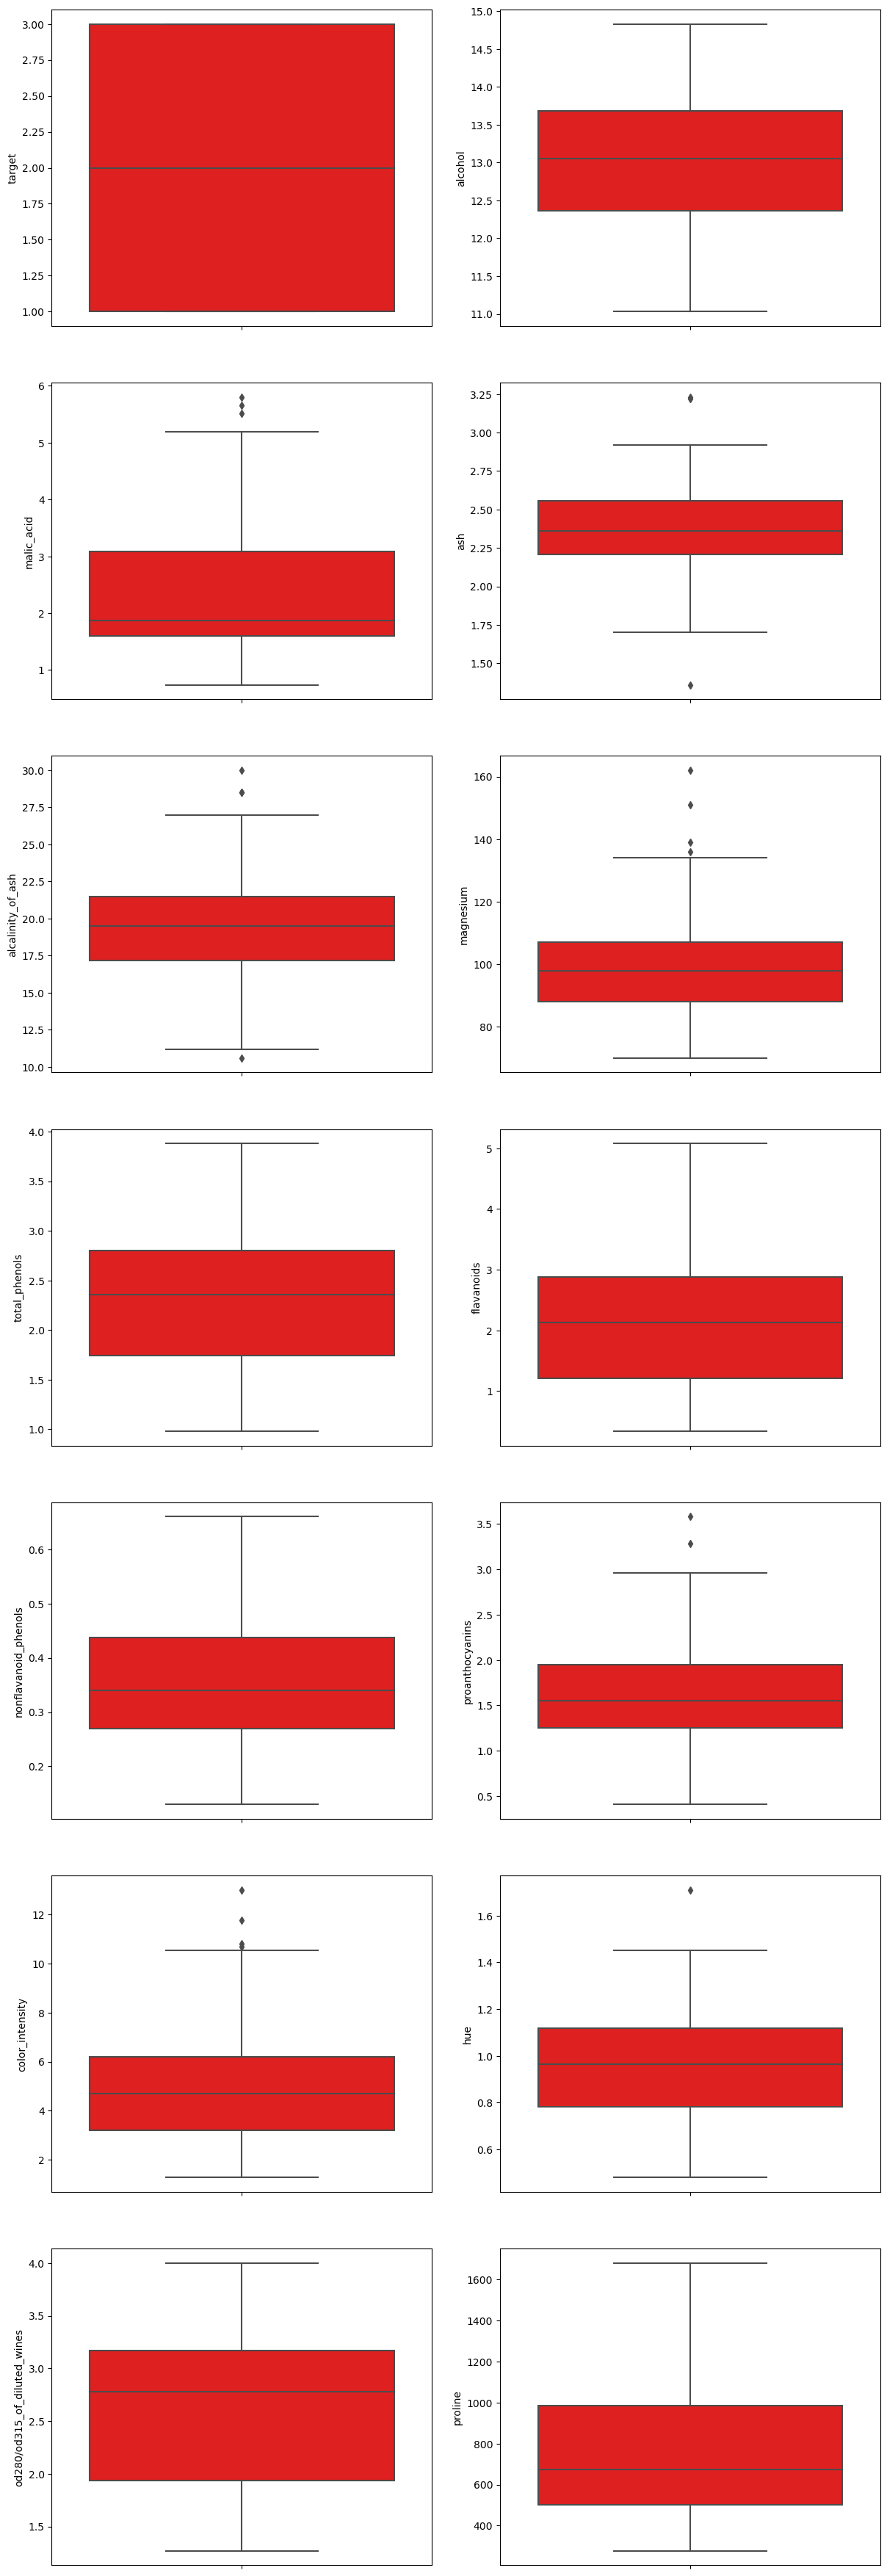

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(12, 35))
i = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[i], color = 'r')
    i += 1
plt.tight_layout(pad=0.4, w_pad=2, h_pad=5.0)

plt.show()

In [15]:
with_outliers = ['malic_acid', 'ash', 'magnesium', 'proanthocyanins', 'color_intensity', 'hue']
no_outliers = ['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'od280/od315_of_diluted_wines', 'proline']

Podem observar que les columnes que tenen outliers, a les quals se les aplicara RobustScaler, són:

- malic_acid, ash, magnesium, proanthocyanins, color_intensity i hue.

La columna target (tipus de vi) no té outliers i no la transformarem, de fet serà la variable objectiu.

Les columnes sense outliers a les que se les aplicara MinMax, són:

- alcohol, total_phenols, flavanoids, nonflavanoid_phenols, od280/od315_of_diluted_wines i proline.

Farem les transformacions directament en el dataframe, sense fer cap copia per optimitzar espai.

In [16]:
print(gaussians_list)
print(with_outliers)
print(no_outliers)

['alcalinity_of_ash']
['malic_acid', 'ash', 'magnesium', 'proanthocyanins', 'color_intensity', 'hue']
['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'od280/od315_of_diluted_wines', 'proline']


In [17]:
from sklearn import preprocessing

# StandarScaler with gaussians
st_sc = preprocessing.StandardScaler().fit(df[['alcalinity_of_ash']])
df['alcalinity_of_ash'] = st_sc.transform(df[['alcalinity_of_ash']])

# RobustScaler with outliers
RS = preprocessing.RobustScaler().fit(df[['malic_acid', 'ash', 'magnesium', 'proanthocyanins', 'color_intensity', 'hue']])
df[['malic_acid', 'ash', 'magnesium', 'proanthocyanins', 'color_intensity', 'hue']] = RS.transform(df[['malic_acid', 'ash', 'magnesium', 'proanthocyanins', 'color_intensity', 'hue']])

# MinMax with no-outliers
MM = preprocessing.MinMaxScaler().fit(df[['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'od280/od315_of_diluted_wines', 'proline']])
df[['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'od280/od315_of_diluted_wines', 'proline']] = MM.transform(df[['alcohol', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'od280/od315_of_diluted_wines', 'proline']])

df.T

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
target,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
alcohol,0.842105,0.571053,0.560526,0.878947,0.581579,0.834211,0.884211,0.797368,1.000000,0.744737,...,0.671053,0.623684,0.307895,0.457895,0.823684,0.705263,0.623684,0.589474,0.563158,0.815789
malic_acid,-0.104730,-0.057432,0.334459,0.057432,0.489865,-0.070946,0.003378,0.192568,-0.152027,-0.347973,...,0.483108,1.847973,0.787162,0.354730,0.435811,2.557432,1.381757,1.631757,0.489865,1.510135
ash,0.201439,-0.633094,0.892086,0.402878,1.467626,0.258993,0.258993,0.719424,-0.546763,-0.258993,...,0.949640,1.438849,-0.115108,-0.230216,0.345324,0.258993,0.345324,-0.287770,0.028777,1.093525
alcalinity_of_ash,-1.169593,-2.490847,-0.268738,-0.809251,0.451946,-1.289707,-1.469878,-0.569023,-1.650049,-1.049479,...,1.502943,1.653086,-0.148624,0.001518,0.151661,0.301803,1.052516,0.151661,0.151661,1.502943
magnesium,1.526316,0.105263,0.157895,0.789474,1.052632,0.736842,-0.105263,1.210526,-0.052632,0.000000,...,0.368421,0.736842,-0.105263,-0.631579,-0.368421,-0.157895,0.210526,1.157895,1.157895,-0.105263
total_phenols,0.627586,0.575862,0.627586,0.989655,0.627586,0.789655,0.524138,0.558621,0.627586,0.689655,...,0.196552,0.344828,0.093103,0.141379,0.241379,0.241379,0.282759,0.210345,0.231034,0.368966
flavanoids,0.573840,0.510549,0.611814,0.664557,0.495781,0.643460,0.459916,0.457806,0.556962,0.592827,...,0.105485,0.130802,0.031646,0.035865,0.075949,0.056962,0.086498,0.073840,0.071730,0.088608
nonflavanoid_phenols,0.283019,0.245283,0.320755,0.207547,0.490566,0.396226,0.320755,0.339623,0.301887,0.169811,...,0.490566,0.264151,0.509434,0.660377,0.584906,0.735849,0.566038,0.566038,0.754717,0.811321
proanthocyanins,1.050000,-0.392857,1.792857,0.892857,0.378571,0.592857,0.607143,-0.435714,0.607143,0.421429,...,-0.021429,-0.635714,-1.178571,-1.307143,-0.450000,-0.707143,-0.207143,-0.292857,-0.135714,-0.292857


In [18]:
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
target,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
alcohol,0.842105,0.571053,0.560526,0.878947,0.581579,0.834211,0.884211,0.797368,1.000000,0.744737
malic_acid,-0.104730,-0.057432,0.334459,0.057432,0.489865,-0.070946,0.003378,0.192568,-0.152027,-0.347973
ash,0.201439,-0.633094,0.892086,0.402878,1.467626,0.258993,0.258993,0.719424,-0.546763,-0.258993
alcalinity_of_ash,-1.169593,-2.490847,-0.268738,-0.809251,0.451946,-1.289707,-1.469878,-0.569023,-1.650049,-1.049479
magnesium,1.526316,0.105263,0.157895,0.789474,1.052632,0.736842,-0.105263,1.210526,-0.052632,0.000000
total_phenols,0.627586,0.575862,0.627586,0.989655,0.627586,0.789655,0.524138,0.558621,0.627586,0.689655
flavanoids,0.573840,0.510549,0.611814,0.664557,0.495781,0.643460,0.459916,0.457806,0.556962,0.592827
nonflavanoid_phenols,0.283019,0.245283,0.320755,0.207547,0.490566,0.396226,0.320755,0.339623,0.301887,0.169811
proanthocyanins,1.050000,-0.392857,1.792857,0.892857,0.378571,0.592857,0.607143,-0.435714,0.607143,0.421429


In [19]:
df.tail(10).T

,168,169,170,171,172,173,174,175,176,177
target,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
alcohol,0.671053,0.623684,0.307895,0.457895,0.823684,0.705263,0.623684,0.589474,0.563158,0.815789
malic_acid,0.483108,1.847973,0.787162,0.354730,0.435811,2.557432,1.381757,1.631757,0.489865,1.510135
ash,0.949640,1.438849,-0.115108,-0.230216,0.345324,0.258993,0.345324,-0.287770,0.028777,1.093525
alcalinity_of_ash,1.502943,1.653086,-0.148624,0.001518,0.151661,0.301803,1.052516,0.151661,0.151661,1.502943
magnesium,0.368421,0.736842,-0.105263,-0.631579,-0.368421,-0.157895,0.210526,1.157895,1.157895,-0.105263
total_phenols,0.196552,0.344828,0.093103,0.141379,0.241379,0.241379,0.282759,0.210345,0.231034,0.368966
flavanoids,0.105485,0.130802,0.031646,0.035865,0.075949,0.056962,0.086498,0.073840,0.071730,0.088608
nonflavanoid_phenols,0.490566,0.264151,0.509434,0.660377,0.584906,0.735849,0.566038,0.566038,0.754717,0.811321
proanthocyanins,-0.021429,-0.635714,-1.178571,-1.307143,-0.450000,-0.707143,-0.207143,-0.292857,-0.135714,-0.292857


### test train split

Separem la columna objectiu (target) i farem el split amb un 20 % de les dades reservat pel test. Afegirem un random state igual a 1 per reproducibilitat amb un exercici posterior.

In [20]:
#split dataset in features and target variable

X = df.drop('target', axis=1) # Features
y = df['target'] # Target variable

X

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.842105,-0.104730,0.201439,-1.169593,1.526316,0.627586,0.573840,0.283019,1.050000,0.318792,0.222222,0.970696,0.561341
1,0.571053,-0.057432,-0.633094,-2.490847,0.105263,0.575862,0.510549,0.245283,-0.392857,-0.104027,0.251852,0.780220,0.550642
2,0.560526,0.334459,0.892086,-0.268738,0.157895,0.627586,0.611814,0.320755,1.792857,0.332215,0.192593,0.695971,0.646933
3,0.878947,0.057432,0.402878,-0.809251,0.789474,0.989655,0.664557,0.207547,0.892857,1.043624,-0.311111,0.798535,0.857347
4,0.581579,0.489865,1.467626,0.451946,1.052632,0.627586,0.495781,0.490566,0.378571,-0.124161,0.222222,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,2.557432,0.258993,0.301803,-0.157895,0.241379,0.056962,0.735849,-0.707143,1.010067,-0.962963,0.172161,0.329529
174,0.623684,1.381757,0.345324,1.052516,0.210526,0.282759,0.086498,0.566038,-0.207143,0.875839,-0.785185,0.106227,0.336662
175,0.589474,1.631757,-0.287770,0.151661,1.157895,0.210345,0.073840,0.566038,-0.292857,1.848993,-1.111111,0.106227,0.397290
176,0.563158,0.489865,0.028777,0.151661,1.157895,0.231034,0.071730,0.754717,-0.135714,1.546980,-1.081481,0.128205,0.400856


In [21]:
y

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: target, Length: 178, dtype: int64

In [22]:
import pandas as pd

from sklearn.model_selection import train_test_split # Import train_test_split function

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
91,0.255263,-0.239865,0.172662,0.752231,-0.631579,0.162069,0.191983,0.698113,0.107143,-0.365772,0.251852,0.505495,0.122682
81,0.444737,-0.037162,-0.460432,-0.208681,-0.631579,0.420690,0.462025,0.245283,0.307143,-0.265101,0.577778,0.684982,0.310984
114,0.276316,-0.320946,0.402878,0.902373,-0.736842,0.544828,0.411392,0.566038,-0.735714,-0.600671,-0.103704,0.703297,0.076320
48,0.807895,0.104730,0.115108,-0.208681,0.263158,0.610345,0.544304,0.358491,1.178571,0.506711,0.311111,0.542125,0.557775
54,0.713158,-0.131757,-0.316547,-0.929365,1.052632,0.558621,0.540084,0.150943,0.092857,0.389262,-0.133333,0.706960,0.557775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.439474,1.138514,0.000000,0.602088,0.421053,0.248276,0.181435,0.075472,-1.021429,0.104027,-0.548148,0.007326,0.229672
137,0.394737,2.462838,0.805755,1.653086,-0.105263,0.279310,0.054852,0.943396,-0.650000,0.104027,-0.429630,0.153846,0.169044
72,0.647368,-0.138514,-0.345324,1.352801,-0.578947,0.310345,0.316456,0.264151,-0.750000,-0.318792,0.044444,0.553114,0.138374
140,0.500000,0.638514,0.978417,0.451946,-0.105263,0.193103,0.033755,0.754717,-1.150000,-0.030201,-0.577778,0.380952,0.229672


In [23]:
len(X_test)

36

In [24]:
y_train

91     2
81     2
114    2
48     1
54     1
      ..
133    3
137    3
72     2
140    3
37     1
Name: target, Length: 142, dtype: int64

In [25]:
len(y_test)

36

## Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

Importarem 8 models de classificació, els hem instanciat amb els seus paràmetres per defecte, els hem entrenat i hem utilitzat un bucle for per calcular tant l'accuracy com el f1-score. Hem deixat el codi comentat per calcular també precision i recall.

Els models són: Decision Tree Classifier, K Neighbors Classifier, Support Vector Classificator, Logistic Regression, Random Forest Classifier, Gaussian Naive Bayes, Gradient Boosting Classifier, Ridge Classifier.

Alguns destaquen molt, com el Gaussian Naive Bayes i el Ridge Classifier, de fet donen resultats (d'accuracy i f1-score) perfectes, la qual cosa podria indicar overfitting (esperarem a fer cross calidation per no treure conclusions abans d'hora). Els que fallen una mica més són el Decision Tree Classifier i el K Neighbors Classifier.

In [26]:
import warnings
warnings.filterwarnings("ignore")

from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

dtc = DecisionTreeClassifier()
knnc = KNeighborsClassifier()
svc = svm.SVC()
lrc = LogisticRegression()
rfc = RandomForestClassifier()
gnb = GaussianNB()
gbc = GradientBoostingClassifier()
rc = RidgeClassifier()

dtc.fit(X_train,y_train)
knnc.fit(X_train, y_train)
svc.fit(X_train, y_train)
lrc.fit(X_train, y_train)
rfc.fit(X_train,y_train)
gnb.fit(X_train, y_train)
gbc.fit(X_train, y_train)
rc.fit(X_train, y_train)


all_models = [dtc, knnc, svc, lrc, rfc, gnb, gbc, rc]

models_scores = []

for model in all_models:
    models_scores.append(model)
    models_scores.append({'test_accuracy' : metrics.accuracy_score(y_test, model.predict(X_test)).round(2)})
    models_scores.append({'test_f1_macro (avg.)' : metrics.f1_score(y_test, model.predict(X_test), average='weighted').round(2)})
    # models_scores.append({'precision (avg.)' : metrics.precision_score(y_test, model.predict(X_test), average='weighted').round(2)})
    # models_scores.append({'recall (avg.)' : metrics.recall_score(y_test, model.predict(X_test), average='weighted').round(2)})

for lst in models_scores:
    print(lst)

DecisionTreeClassifier()
{'test_accuracy': 0.86}
{'test_f1_macro (avg.)': 0.86}
KNeighborsClassifier()
{'test_accuracy': 0.89}
{'test_f1_macro (avg.)': 0.89}
SVC()
{'test_accuracy': 0.97}
{'test_f1_macro (avg.)': 0.97}
LogisticRegression()
{'test_accuracy': 0.94}
{'test_f1_macro (avg.)': 0.94}
RandomForestClassifier()
{'test_accuracy': 0.97}
{'test_f1_macro (avg.)': 0.97}
GaussianNB()
{'test_accuracy': 1.0}
{'test_f1_macro (avg.)': 1.0}
GradientBoostingClassifier()
{'test_accuracy': 0.94}
{'test_f1_macro (avg.)': 0.94}
RidgeClassifier()
{'test_accuracy': 1.0}
{'test_f1_macro (avg.)': 1.0}


## Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

Per fer això creem un codi que ens mostrarà a cada fila la matriu de confusió (CM) i el classification report (CR), que és el que ens mostra les mètriques avançades, incloent l'accuracy. Aquest report també ens mostra les metriques precision, recall i f1-score. En aquest exercici ens cenyirem a accuracy i f1-score per comparar models


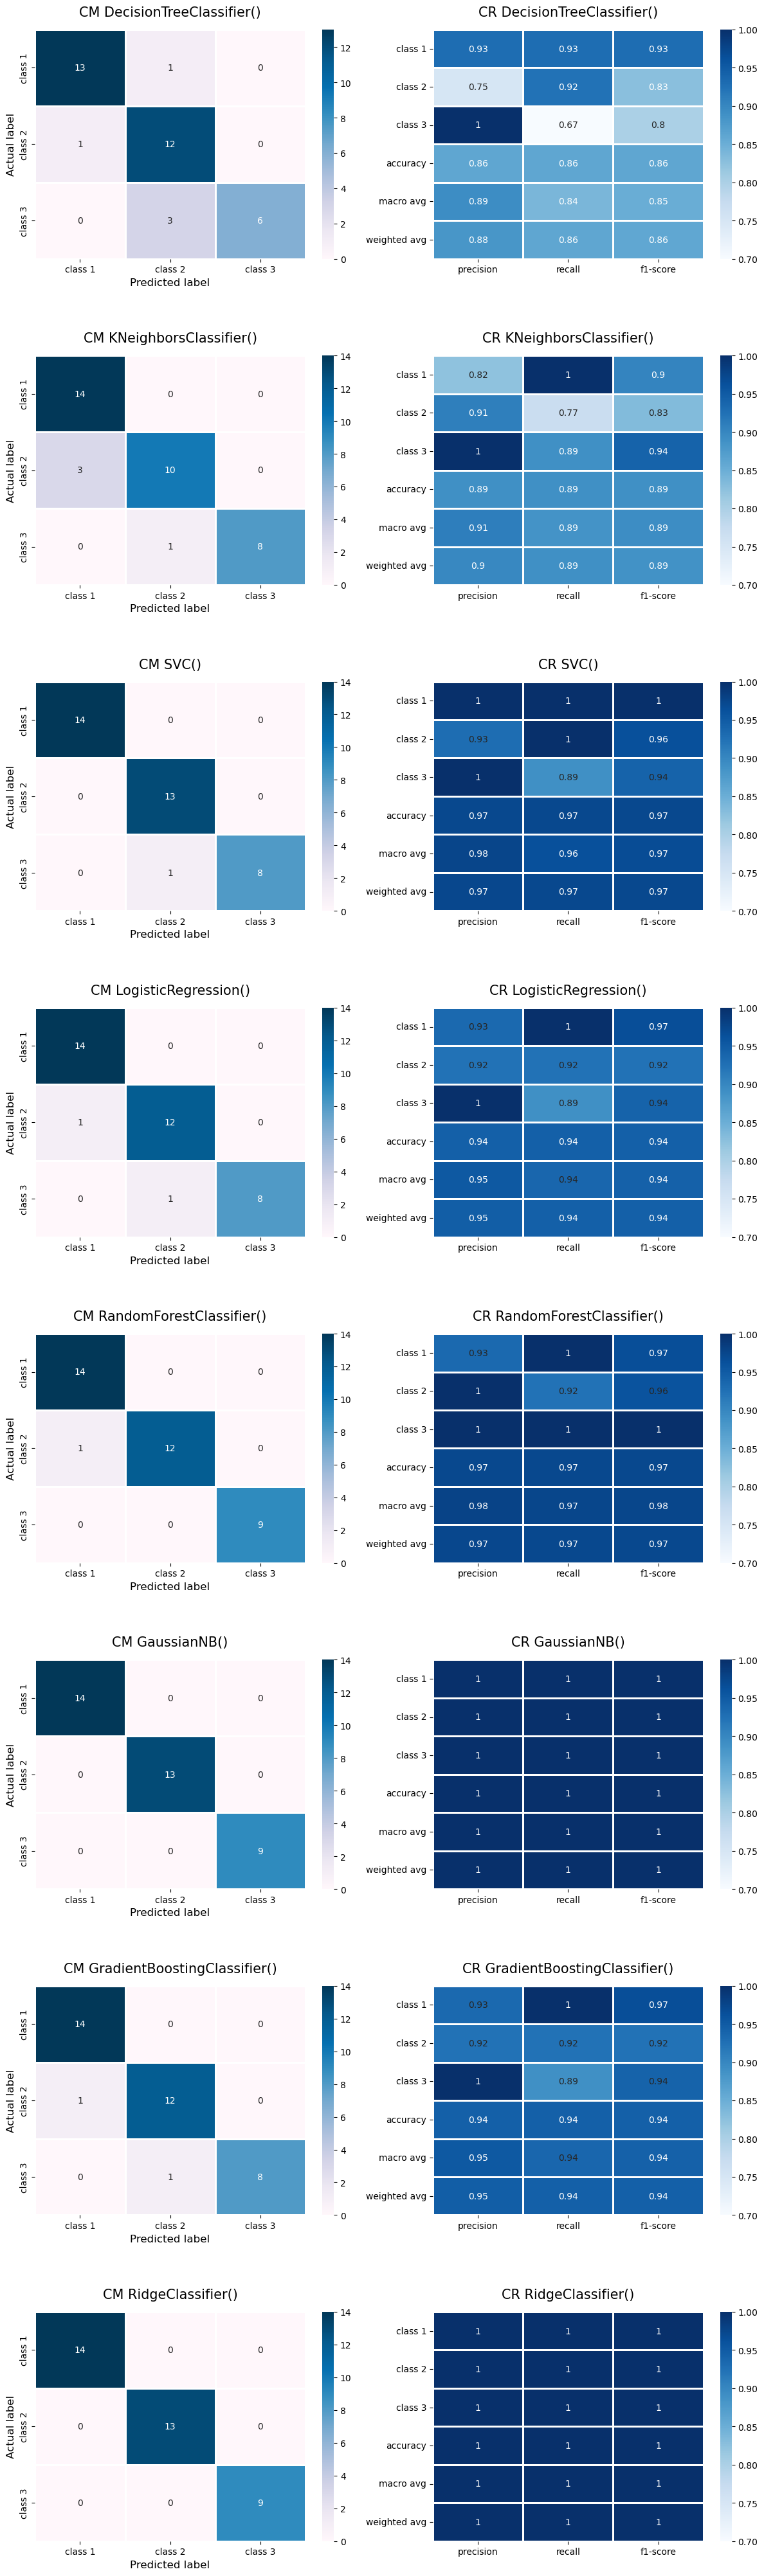

In [27]:
plt.figure(figsize=(12, 40))

for i in range(len(all_models)):
        model = all_models[i]
        plt.subplot(len(all_models), 2, (2*i+1))      # confusion matrix
        sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='d', cmap='PuBu', 
                    linewidths=2, xticklabels=['class 1', 'class 2', 'class 3'], yticklabels=['class 1', 'class 2', 'class 3'])
        plt.xlabel('Predicted label', fontsize=12)
        plt.ylabel('Actual label', fontsize=12)
        plt.title('CM ' + str(model), fontsize=15, pad=15)

        plt.subplot(len(all_models), 2, (2*i+2))      # classification report
        sns.heatmap(pd.DataFrame(classification_report(y_test, model.predict(X_test), 
                    target_names=['class 1', 'class 2', 'class 3'], output_dict=True))
                    .iloc[:-1, :].T, annot=True, linewidths=1, cmap = "Blues")
        plt.gca().collections[0].set_clim(0.7,1)    # keep the colobar constant
        plt.title('CR ' + str(model), fontsize=15, pad=15)

plt.tight_layout(pad=0.4, w_pad=0.6, h_pad=5.0)

plt.show()

Veiem que Logistic Regression i Gradient Boosting classifier tenen una mica de problemes classificant la classe 2, i donen un parell de falsos negatius per aquesta classe. Support Vector i Random Forest també donen un fals negatiu (curiosament també per la classe 2). Com ja hem dit Ridge Classifier i Gaussian Naive Bayes ho claven. Els que fallen bastant són K Neighbors Classifier (amb falsos negatius) i Decision Tree Classifier (amb falsos negatius i positius).

## Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.

Aquest exercici el farem pels models que fallen bastant, aquests són el Decission Tree Classifier i el K Nearest Neighbors. Farem un GridSearch amb diferents paràmetres que hem trobat que són relevants i els seus diversos valors amb una cerca a internet (consultar sources més avall).

Després deixarem executant el GridSearchCV (amb 5 crossvalidations) per a cada model amb el seu corresponent diccionari de parametres i valors. Una vegada acabi obtindrem una llista amb els millors parametres per a cada model.

In [28]:
from sklearn.model_selection import GridSearchCV


In [29]:
model_params = {
    'Decision Tree Classifier' : {
        'model': DecisionTreeClassifier(),
        'params' : {
            'criterion' : ['gini', 'entropy', 'log_loss'],
            'splitter' : ['best', 'random'],
            'random_state' : [int, 'RandomState instance', None],
            'max_features' : [int, float, 'auto', 'sqrt', 'log2', None]
            }
    },
    'K Nearest Neighbors' : {
        'model': KNeighborsClassifier(),
        'params' : {
            'n_neighbors' : range(2, 15),
            'weights' : ['uniform', 'distance'],
            'metric' : ['euclidean', 'manhattan', 'minkowski'],
            'p' : [1,2]
            }
    }
}

In [30]:

scores_GS = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False, n_jobs=-1)
    clf.fit(X, y)
    scores_GS.append({
        'model': model_name,
        'best score': clf.best_score_,
        'best parameters': clf.best_params_})

scores_GS


[{'model': 'Decision Tree Classifier',
  'best score': 0.9326984126984128,
  'best parameters': {'criterion': 'gini',
   'max_features': 'log2',
   'random_state': None,
   'splitter': 'best'}},
 {'model': 'K Nearest Neighbors',
  'best score': 0.9661904761904762,
  'best parameters': {'metric': 'manhattan',
   'n_neighbors': 4,
   'p': 1,
   'weights': 'distance'}}]

Instanciem aquests 2 models de nou i els hi passem els millors parametres, els tornem a entrenar i calculem els valors de d'accuracy i f1-score. Compararem aquests valors abans i després de tunejar els parametres. També tornarem a fer la confusison matrix i el classification report.

In [31]:
dtc_gs = DecisionTreeClassifier(criterion = scores_GS[0]['best parameters']['criterion'], 
                                max_features = scores_GS[0]['best parameters']['max_features'], 
                                random_state = scores_GS[0]['best parameters']['random_state'], 
                                splitter = scores_GS[0]['best parameters']['splitter'])
knnc_gs = KNeighborsClassifier(metric = scores_GS[1]['best parameters']['metric'], 
                               n_neighbors = scores_GS[1]['best parameters']['n_neighbors'], 
                               p = scores_GS[1]['best parameters']['p'], 
                               weights = scores_GS[1]['best parameters']['weights'])

dtc_gs.fit(X_train,y_train)
knnc_gs.fit(X_train,y_train)

models_gs_total = [dtc_gs, knnc_gs]

models_gs_scores = []

for model in models_gs_total:
    models_gs_scores.append(model)
    models_gs_scores.append({'test_accuracy' : metrics.accuracy_score(y_test, model.predict(X_test)).round(2)})
    models_gs_scores.append({'test_f1_macro (avg.)' : metrics.f1_score(y_test, model.predict(X_test), average='weighted').round(2)})

for lst in models_gs_scores:
    print(lst)

DecisionTreeClassifier(max_features='log2')
{'test_accuracy': 0.97}
{'test_f1_macro (avg.)': 0.97}
KNeighborsClassifier(metric='manhattan', n_neighbors=4, p=1, weights='distance')
{'test_accuracy': 0.97}
{'test_f1_macro (avg.)': 0.97}


In [32]:
for lst in models_scores[:6]:
    print(lst)

DecisionTreeClassifier()
{'test_accuracy': 0.86}
{'test_f1_macro (avg.)': 0.86}
KNeighborsClassifier()
{'test_accuracy': 0.89}
{'test_f1_macro (avg.)': 0.89}


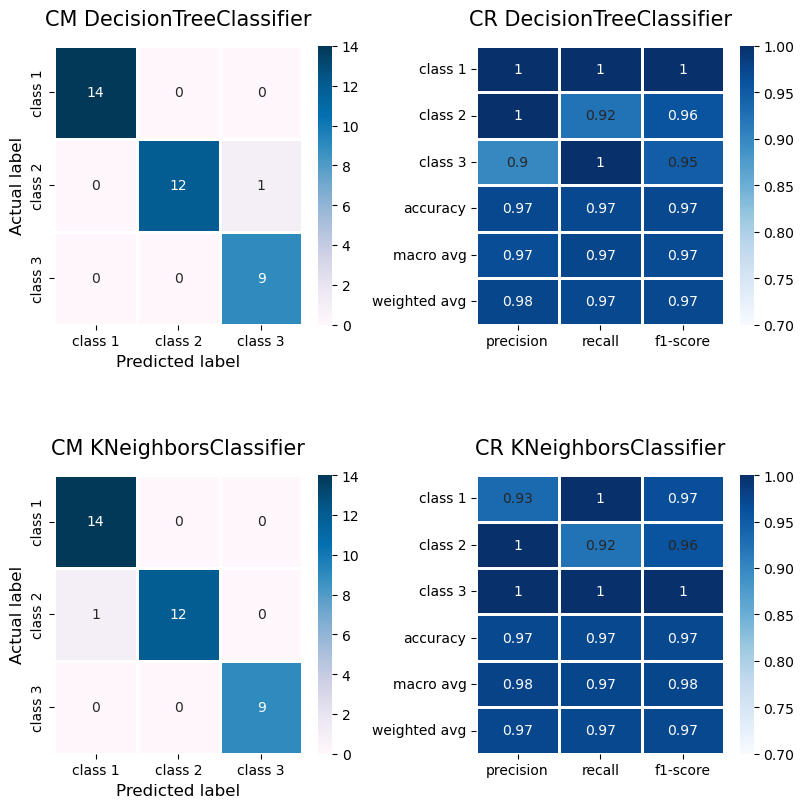

In [33]:
plt.figure(figsize=(8, 8))

for i in range(len(models_gs_total)):
        model = models_gs_total[i]
        plt.subplot(len(models_gs_total), 2, (2*i+1))      # confusion matrix
        sns.heatmap(confusion_matrix(y_test, model.predict(X_test)), annot=True, fmt='d', cmap='PuBu', 
                    linewidths=2, xticklabels=['class 1', 'class 2', 'class 3'], yticklabels=['class 1', 'class 2', 'class 3'])
        plt.xlabel('Predicted label', fontsize=12)
        plt.ylabel('Actual label', fontsize=12)
        plt.title('CM ' + ((str(model)).partition('('))[0], fontsize=15, pad=15)

        plt.subplot(len(models_gs_total), 2, (2*i+2))      # classification report
        sns.heatmap(pd.DataFrame(classification_report(y_test, model.predict(X_test), 
                    target_names=['class 1', 'class 2', 'class 3'], output_dict=True))
                    .iloc[:-1, :].T, annot=True, linewidths=1, cmap = "Blues")
        plt.gca().collections[0].set_clim(0.7,1)    # keep the colobar constant
        plt.title('CR ' + ((str(model)).partition('('))[0], fontsize=15, pad=15)

plt.tight_layout(pad=0.4, w_pad=0.6, h_pad=5.0)

plt.show()

Podem observar com els models han millorat molt. Val a dir que en el cas del model K Neighbors Classifier, el parametre n_neighbors per defecte és 5, i en la optimització ens ha sortit 4. Aquest és un paràmetre clau per aquest model.

## Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

Per aixo farem servir cross validation. Aixo fa que el model iteri i faci torns a l'hora de seleccionar entre el dataset per fer train i test.

Establirem que el scoring estigui basat en els parametres accuracy i f1 macro (així podrem fer comparació amb altres casos). Per això hem de importar cross_validate, no val importar cross_val_score, ja que només ens deixaria fer el scoring basant-nos en un paràmetre.

Aquests valors de d'accuracy i f1-score serà la mitja dels valors calculats en els 5 loops. Utilitzarem shuffle split per randomitzar les mostres per fer train i test.

Val a dir que utilitzarem els 2 models amb els millors paràmetres de l'exercici 3. Després compararem resultats amb els valors sense cross validation.

In [34]:
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

models_tots = [DecisionTreeClassifier(criterion = scores_GS[0]['best parameters']['criterion'], 
                                      max_features = scores_GS[0]['best parameters']['max_features'], 
                                      random_state = scores_GS[0]['best parameters']['random_state'], 
                                      splitter = scores_GS[0]['best parameters']['splitter']), 
               KNeighborsClassifier(metric = scores_GS[1]['best parameters']['metric'], 
                                    n_neighbors = scores_GS[1]['best parameters']['n_neighbors'], 
                                    p = scores_GS[1]['best parameters']['p'], 
                                    weights = scores_GS[1]['best parameters']['weights']), 
               svm.SVC(), LogisticRegression(), RandomForestClassifier(), GaussianNB(), 
               GradientBoostingClassifier(), RidgeClassifier()]

cv_scores = []

for model in models_tots:
    cvs = cross_validate(model, X, y, cv=cv, scoring=['accuracy', 'f1_macro'])
    cv_scores.append({model : cvs})

# per mostrar els resultats:
print('Coefficients:')
for n in range(len(cv_scores)):
    for k, v in cv_scores[n].items():
        print('\n')
        print(k)
        for i, j in v.items():
            if i == 'test_accuracy' or i == 'test_f1_macro':
                print(i, j, (', average:'), np.mean(j).round(2))


Coefficients:


DecisionTreeClassifier(max_features='log2')
test_accuracy [0.94444444 0.94444444 0.86111111 0.91666667 0.88888889] , average: 0.91
test_f1_macro [0.9406425  0.93766036 0.86309524 0.91428571 0.88214286] , average: 0.91


KNeighborsClassifier(metric='manhattan', n_neighbors=4, p=1, weights='distance')
test_accuracy [0.94444444 0.91666667 0.97222222 1.         0.91666667] , average: 0.95
test_f1_macro [0.9406425  0.90292466 0.9654321  1.         0.91987869] , average: 0.95


SVC()
test_accuracy [1.         0.94444444 0.94444444 0.97222222 0.91666667] , average: 0.96
test_f1_macro [1.         0.91666667 0.95396825 0.96658312 0.92795031] , average: 0.95


LogisticRegression()
test_accuracy [0.91666667 0.94444444 0.97222222 1.         0.91666667] , average: 0.95
test_f1_macro [0.90640394 0.93180354 0.97701149 1.         0.91969697] , average: 0.95


RandomForestClassifier()
test_accuracy [0.97222222 0.97222222 1.         1.         1.        ] , average: 0.99
test_f1_macro [0

In [35]:
for lst in models_gs_scores:
    print(lst)

DecisionTreeClassifier(max_features='log2')
{'test_accuracy': 0.97}
{'test_f1_macro (avg.)': 0.97}
KNeighborsClassifier(metric='manhattan', n_neighbors=4, p=1, weights='distance')
{'test_accuracy': 0.97}
{'test_f1_macro (avg.)': 0.97}


In [36]:
for lst in models_scores[6:]:
    print(lst)

SVC()
{'test_accuracy': 0.97}
{'test_f1_macro (avg.)': 0.97}
LogisticRegression()
{'test_accuracy': 0.94}
{'test_f1_macro (avg.)': 0.94}
RandomForestClassifier()
{'test_accuracy': 0.97}
{'test_f1_macro (avg.)': 0.97}
GaussianNB()
{'test_accuracy': 1.0}
{'test_f1_macro (avg.)': 1.0}
GradientBoostingClassifier()
{'test_accuracy': 0.94}
{'test_f1_macro (avg.)': 0.94}
RidgeClassifier()
{'test_accuracy': 1.0}
{'test_f1_macro (avg.)': 1.0}


Aquí mostrem la taula de resultats fins ara. La primera cosa que crida l'atenció és que Gaussian Naive Bayes i Ridge Classifier no eren tan perfectes com semblava (han passat de 1 a 0.97 i 0.98).

Pel que fa als models amb hyperparameters, veiem una davallada, de 0.97 a 0.91 i 0.95. Pel que fa a la resta s'han mantingut poc o molt bastant semblants (algun fins i tot ha tret millors resultats).

Tot i que les metriques han sortit pitjors (en general) amb CV, hem de dir que els resultats són més realistes i a més a més, molt per sobre de la 'baseline' que hem declarat al començar la tasca. 

|                                   |     Default     |    GridSearch    |    Cross_Val      | 
|:----------------------------------|:---------------:|:----------------:|:-----------------:|
|Decision Tree Classifier           |   0.86 / 0.86   |    -   /  -      |  -   /  -         |
|Decision Tree Classifier (params.) |    -   /  -     |   0.97 / 0.97    | 0.91 / 0.91       |
|K Neighbors Classifier             |   0.89 / 0.89   |    -   /  -      |  -   /  -         |
|K Neighbors Classifier (params.)   |    -   /  -     |   0.97 / 0.97    | 0.95 / 0.95       |
|Support Vector Classificator       |   0.97 / 0.97   |    -   /  -      | 0.96 / 0.95       |
|Logistic Regression                |   0.94 / 0.94   |    -   /  -      | 0.95 / 0.95       |
|Random Forest Classifier           |   0.97 / 0.97   |    -   /  -      | 0.99 / 0.98       |
|Gaussian Naive Bayes               |   1.00 / 1.00   |    -   /  -      | 0.97 / 0.97       |
|Gradient Boosting Classifier       |   0.94 / 0.94   |    -   /  -      | 0.94 / 0.95       |
|Ridge Classifier                   |   1.00 / 1.00   |    -   /  -      | 0.98 / 0.98       |

### Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

Tornem a fer un dataframe amb les dades originals i no les transformarem. Utilitzem el mateix random state (1) quan fem train/test. Tot fa pensar que els models empitjoraran, com a minim, aquells que fossin afectats per outliers, etc.

Per fer la comparació entre metriques obtingudes amb i sense transformació de dades, utilitzarem els models amb hyperparameters i cross validation.

In [37]:

colnames_NT = ['alcohol',  'malic_acid',  'ash',  'alcalinity_of_ash',  'magnesium',  'total_phenols',  'flavanoids', 
            'nonflavanoid_phenols',  'proanthocyanins',  'color_intensity',  'hue',  'od280/od315_of_diluted_wines',  'proline']

df_NT = pd.read_csv(r'C:\Users\WotanJr\Desktop\Data Science - IT Academy\Sprint 7\wineData.txt', names=colnames)

df_NT.reset_index(inplace=True)    # posem tots els index en una columna que per defecte s'anomena 'index'. Es creen nous index.
df_NT = df.rename(columns = {'index':'target'})    # canviem el nom de la columna 'index' a 'target'
df_NT.T

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
target,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
alcohol,0.842105,0.571053,0.560526,0.878947,0.581579,0.834211,0.884211,0.797368,1.000000,0.744737,...,0.671053,0.623684,0.307895,0.457895,0.823684,0.705263,0.623684,0.589474,0.563158,0.815789
malic_acid,-0.104730,-0.057432,0.334459,0.057432,0.489865,-0.070946,0.003378,0.192568,-0.152027,-0.347973,...,0.483108,1.847973,0.787162,0.354730,0.435811,2.557432,1.381757,1.631757,0.489865,1.510135
ash,0.201439,-0.633094,0.892086,0.402878,1.467626,0.258993,0.258993,0.719424,-0.546763,-0.258993,...,0.949640,1.438849,-0.115108,-0.230216,0.345324,0.258993,0.345324,-0.287770,0.028777,1.093525
alcalinity_of_ash,-1.169593,-2.490847,-0.268738,-0.809251,0.451946,-1.289707,-1.469878,-0.569023,-1.650049,-1.049479,...,1.502943,1.653086,-0.148624,0.001518,0.151661,0.301803,1.052516,0.151661,0.151661,1.502943
magnesium,1.526316,0.105263,0.157895,0.789474,1.052632,0.736842,-0.105263,1.210526,-0.052632,0.000000,...,0.368421,0.736842,-0.105263,-0.631579,-0.368421,-0.157895,0.210526,1.157895,1.157895,-0.105263
total_phenols,0.627586,0.575862,0.627586,0.989655,0.627586,0.789655,0.524138,0.558621,0.627586,0.689655,...,0.196552,0.344828,0.093103,0.141379,0.241379,0.241379,0.282759,0.210345,0.231034,0.368966
flavanoids,0.573840,0.510549,0.611814,0.664557,0.495781,0.643460,0.459916,0.457806,0.556962,0.592827,...,0.105485,0.130802,0.031646,0.035865,0.075949,0.056962,0.086498,0.073840,0.071730,0.088608
nonflavanoid_phenols,0.283019,0.245283,0.320755,0.207547,0.490566,0.396226,0.320755,0.339623,0.301887,0.169811,...,0.490566,0.264151,0.509434,0.660377,0.584906,0.735849,0.566038,0.566038,0.754717,0.811321
proanthocyanins,1.050000,-0.392857,1.792857,0.892857,0.378571,0.592857,0.607143,-0.435714,0.607143,0.421429,...,-0.021429,-0.635714,-1.178571,-1.307143,-0.450000,-0.707143,-0.207143,-0.292857,-0.135714,-0.292857


In [38]:
#split dataset in features and target variable

X_NT = df_NT.drop('target', axis=1) # Features
y_NT = df_NT['target'] # Target variable

X_train_NT, X_test_NT, y_train_NT, y_test_NT = train_test_split(X_NT, y_NT, test_size=0.2, random_state=1)

X_train_NT

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
91,0.255263,-0.239865,0.172662,0.752231,-0.631579,0.162069,0.191983,0.698113,0.107143,-0.365772,0.251852,0.505495,0.122682
81,0.444737,-0.037162,-0.460432,-0.208681,-0.631579,0.420690,0.462025,0.245283,0.307143,-0.265101,0.577778,0.684982,0.310984
114,0.276316,-0.320946,0.402878,0.902373,-0.736842,0.544828,0.411392,0.566038,-0.735714,-0.600671,-0.103704,0.703297,0.076320
48,0.807895,0.104730,0.115108,-0.208681,0.263158,0.610345,0.544304,0.358491,1.178571,0.506711,0.311111,0.542125,0.557775
54,0.713158,-0.131757,-0.316547,-0.929365,1.052632,0.558621,0.540084,0.150943,0.092857,0.389262,-0.133333,0.706960,0.557775
...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,0.439474,1.138514,0.000000,0.602088,0.421053,0.248276,0.181435,0.075472,-1.021429,0.104027,-0.548148,0.007326,0.229672
137,0.394737,2.462838,0.805755,1.653086,-0.105263,0.279310,0.054852,0.943396,-0.650000,0.104027,-0.429630,0.153846,0.169044
72,0.647368,-0.138514,-0.345324,1.352801,-0.578947,0.310345,0.316456,0.264151,-0.750000,-0.318792,0.044444,0.553114,0.138374
140,0.500000,0.638514,0.978417,0.451946,-0.105263,0.193103,0.033755,0.754717,-1.150000,-0.030201,-0.577778,0.380952,0.229672


In [39]:
y_train_NT

91     2
81     2
114    2
48     1
54     1
      ..
133    3
137    3
72     2
140    3
37     1
Name: target, Length: 142, dtype: int64

In [40]:
y_test_NT.shape

(36,)

In [41]:
cv_NT = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

models_tots_NT = [DecisionTreeClassifier(criterion = scores_GS[0]['best parameters']['criterion'], 
                                      max_features = scores_GS[0]['best parameters']['max_features'], 
                                      random_state = scores_GS[0]['best parameters']['random_state'], 
                                      splitter = scores_GS[0]['best parameters']['splitter']),
                  KNeighborsClassifier(metric = scores_GS[1]['best parameters']['metric'], 
                                       n_neighbors = scores_GS[1]['best parameters']['n_neighbors'], 
                                       p = scores_GS[1]['best parameters']['p'], 
                                       weights = scores_GS[1]['best parameters']['weights']), 
                  svm.SVC(), LogisticRegression(), RandomForestClassifier(), GaussianNB(), 
                  GradientBoostingClassifier(), RidgeClassifier()]

cv_scores_NT = []

for model in models_tots_NT:
    cvs = cross_validate(model, X, y, cv=cv_NT, scoring=['accuracy', 'f1_macro'])
    cv_scores_NT.append({model : cvs})

# per mostrar els resultats:
print('Coefficients:')
for n in range(len(cv_scores_NT)):
    for k, v in cv_scores_NT[n].items():
        print('\n')
        print(k)
        for i, j in v.items():
            if i == 'test_accuracy' or i == 'test_f1_macro':
                print(i, j, (', average:'), np.mean(j).round(2))

Coefficients:


DecisionTreeClassifier(max_features='log2')
test_accuracy [0.91666667 0.91666667 0.88888889 0.83333333 0.88888889] , average: 0.89
test_f1_macro [0.90069213 0.88966005 0.88207792 0.8125     0.88339869] , average: 0.87


KNeighborsClassifier(metric='manhattan', n_neighbors=4, p=1, weights='distance')
test_accuracy [0.94444444 0.91666667 0.97222222 1.         0.91666667] , average: 0.95
test_f1_macro [0.9406425  0.90292466 0.9654321  1.         0.91987869] , average: 0.95


SVC()
test_accuracy [1.         0.94444444 0.94444444 0.97222222 0.91666667] , average: 0.96
test_f1_macro [1.         0.91666667 0.95396825 0.96658312 0.92795031] , average: 0.95


LogisticRegression()
test_accuracy [0.91666667 0.94444444 0.97222222 1.         0.91666667] , average: 0.95
test_f1_macro [0.90640394 0.93180354 0.97701149 1.         0.91969697] , average: 0.95


RandomForestClassifier()
test_accuracy [0.97222222 0.97222222 1.         1.         1.        ] , average: 0.99
test_f1_macro [0

In [42]:
# per mostrar els resultats:
print('Coefficients:')
for n in range(len(cv_scores)):
    for k, v in cv_scores[n].items():
        print('\n')
        print(k)
        for i, j in v.items():
            if i == 'test_accuracy' or i == 'test_f1_macro':
                print(i, j, (', average:'), np.mean(j).round(2))

Coefficients:


DecisionTreeClassifier(max_features='log2')
test_accuracy [0.94444444 0.94444444 0.86111111 0.91666667 0.88888889] , average: 0.91
test_f1_macro [0.9406425  0.93766036 0.86309524 0.91428571 0.88214286] , average: 0.91


KNeighborsClassifier(metric='manhattan', n_neighbors=4, p=1, weights='distance')
test_accuracy [0.94444444 0.91666667 0.97222222 1.         0.91666667] , average: 0.95
test_f1_macro [0.9406425  0.90292466 0.9654321  1.         0.91987869] , average: 0.95


SVC()
test_accuracy [1.         0.94444444 0.94444444 0.97222222 0.91666667] , average: 0.96
test_f1_macro [1.         0.91666667 0.95396825 0.96658312 0.92795031] , average: 0.95


LogisticRegression()
test_accuracy [0.91666667 0.94444444 0.97222222 1.         0.91666667] , average: 0.95
test_f1_macro [0.90640394 0.93180354 0.97701149 1.         0.91969697] , average: 0.95


RandomForestClassifier()
test_accuracy [0.97222222 0.97222222 1.         1.         1.        ] , average: 0.99
test_f1_macro [0

Adjuntem de nou la taula amb les metriques accuracy i f1-score per tots els exercicis. En aquest exercici només cal que mirem les dues últimes columnes.

Curiosament l'únic model que ha empitjorat bastant és el Decision Tree Classifier, i també ha empitjorat una mica el Gradient Boosting Classifier. Tots els altres s'han mantingut en metriques semblants. Un motiu podria ser que la resta de models no són gaire afectats per les transformacions o que ja poden modelar bé sense elles. Podria ser que la base de dades no és gaire gran i/o que és fàcil de modelar.


### Taula resum:  accuracy / f1-score

|                                   |     Default     |    GridSearch    |    Cross_Val      |     no_Transf Croos_Val    |
|:----------------------------------|:---------------:|:----------------:|:-----------------:|:--------------------------:|
|Decision Tree Classifier           |   0.86 / 0.86   |    -   /  -      |  -   /  -         |      -   /  -              |
|Decision Tree Classifier (params.) |    -   /  -     |   0.97 / 0.97    | 0.91 / 0.91       |     0.89 / 0.87            |
|K Neighbors Classifier             |   0.89 / 0.89   |    -   /  -      |  -   /  -         |      -   /  -              |
|K Neighbors Classifier (params.)   |    -   /  -     |   0.97 / 0.97    | 0.95 / 0.95       |     0.95 / 0.95            |
|Support Vector Classificator       |   0.97 / 0.97   |    -   /  -      | 0.96 / 0.95       |     0.96 / 0.95            |
|Logistic Regression                |   0.94 / 0.94   |    -   /  -      | 0.95 / 0.95       |     0.95 / 0.95            |
|Random Forest Classifier           |   0.97 / 0.97   |    -   /  -      | 0.99 / 0.98       |     0.99 / 0.98            |
|Gaussian NaiveBayes                |   1.00 / 1.00   |    -   /  -      | 0.97 / 0.97       |     0.97 / 0.97            |
|Gradient Boosting Classifier       |   0.94 / 0.94   |    -   /  -      | 0.94 / 0.95       |     0.94 / 0.94            |
|Ridge Classifier                   |   1.00 / 1.00   |    -   /  -      | 0.98 / 0.98       |     0.98 / 0.98            |


### Sources:

https://github.com/edyoda/data-science-complete-tutorial/blob/master/5.%20PreProcessing.ipynb

https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

https://towardsdatascience.com/grid-search-for-model-tuning-3319b259367e

https://machinelearninghd.com/gridsearchcv-classification-hyper-parameter-tuning/

https://www.kaggle.com/code/orhansertkaya/machine-learning-classification-eda-plotly-seaborn

https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

